In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

## linear dataset

In [2]:
np.random.seed(42)

In [3]:
X,y = make_blobs(n_samples=500,centers=2,n_features=10,random_state=42)
X = X + np.random.normal(scale=2,size=X.shape)

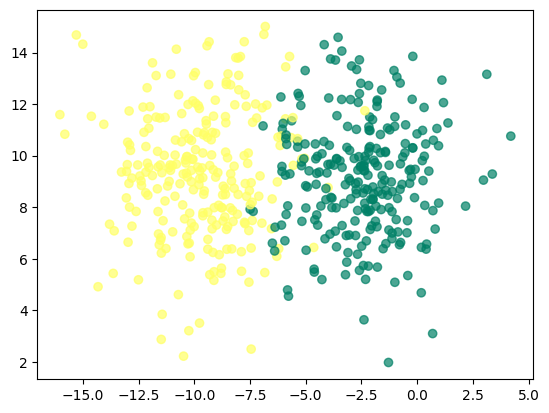

In [4]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer',alpha=0.7)
plt.show()

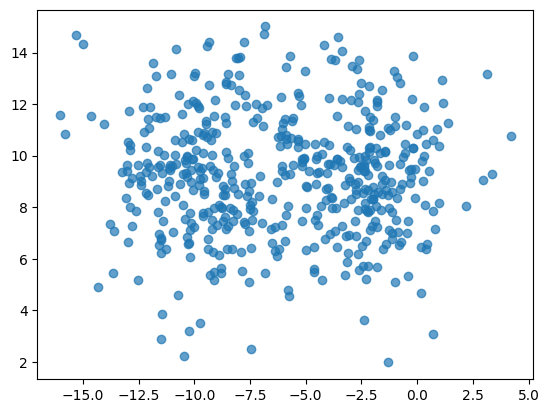

In [5]:
plt.scatter(X[:,0],X[:,1],alpha=0.7)
plt.show()

In [6]:
X.shape

(500, 10)

In [7]:
df_linear = pd.DataFrame(X) 

In [8]:
df_linear.columns = [f"col_{col}" for col in df_linear.columns]

In [9]:
df_linear['target'] = y

In [10]:
df_linear

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,target
0,-8.510377,9.919663,8.867739,-3.757781,-5.963035,-7.986520,-0.168874,2.649737,-4.211365,-2.997318,1
1,-9.108211,7.982619,8.088047,-9.618521,-10.421687,-6.863955,-5.531181,1.480596,-3.095869,-7.037918,1
2,-6.150772,10.393950,7.352012,-9.652370,-6.089703,-4.469450,-3.065086,0.123031,-2.319495,-6.840903,1
3,-9.356636,12.755451,8.075134,-7.946870,-6.560309,-7.881530,-4.087320,-2.725523,-3.992261,-5.324813,1
4,-7.579371,10.102595,8.178744,-6.355739,-10.502419,-7.322124,-2.750386,1.594614,-1.035326,-7.285051,1
...,...,...,...,...,...,...,...,...,...,...,...
495,-3.120487,11.133452,6.915256,4.761410,-6.519883,-9.730306,-10.747599,9.086673,2.809638,5.742837,0
496,-4.506550,7.700916,5.038675,4.754519,-8.498781,-7.132382,-10.467871,11.139466,1.338093,7.345984,0
497,-0.751283,9.681927,3.434378,-3.346889,-9.004924,-8.089847,-7.203933,6.637669,3.819171,-0.007895,0
498,-5.894735,10.662659,5.269152,2.772951,-7.442407,-2.078964,-9.438421,7.035381,1.395390,7.290814,0


### correlation matrix

In [11]:
df_linear.iloc[:,:-1].corr()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9
col_0,1.000000,-0.015691,-0.345016,0.735412,-0.099243,-0.105902,-0.627833,0.715889,0.482154,0.755226
col_1,-0.015691,1.000000,0.007749,-0.053152,0.061991,-0.032506,-0.037661,-0.008792,0.055978,-0.053389
col_2,-0.345016,0.007749,1.000000,-0.355206,0.075962,-0.034382,0.309973,-0.367205,-0.271671,-0.392336
col_3,0.735412,-0.053152,-0.355206,1.000000,-0.139471,-0.074352,-0.650888,0.723930,0.539364,0.788924
col_4,-0.099243,0.061991,0.075962,-0.139471,1.000000,0.006038,0.068251,-0.083744,-0.069368,-0.098011
col_5,-0.105902,-0.032506,-0.034382,-0.074352,0.006038,1.000000,0.050828,-0.076718,-0.061206,-0.092990
col_6,-0.627833,-0.037661,0.309973,-0.650888,0.068251,0.050828,1.000000,-0.629772,-0.418642,-0.677963
col_7,0.715889,-0.008792,-0.367205,0.723930,-0.083744,-0.076718,-0.629772,1.000000,0.463984,0.750120
col_8,0.482154,0.055978,-0.271671,0.539364,-0.069368,-0.061206,-0.418642,0.463984,1.000000,0.534754
col_9,0.755226,-0.053389,-0.392336,0.788924,-0.098011,-0.092990,-0.677963,0.750120,0.534754,1.000000


<Axes: >

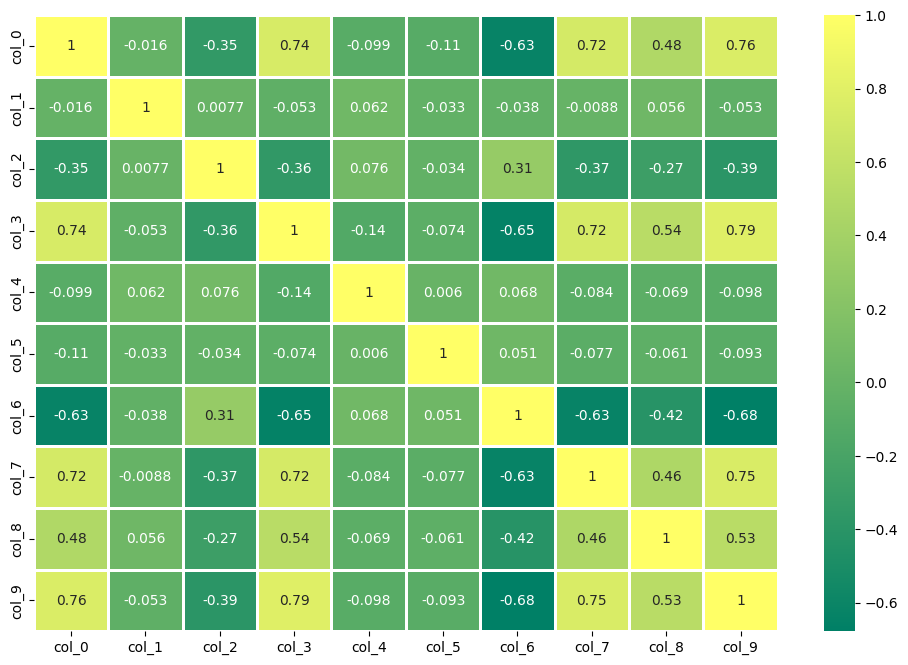

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df_linear.iloc[:,:-1].corr(),cmap='summer',annot=True,linecolor='white',
            linewidths=1)

In [13]:
X_values = df_linear.iloc[:,:-1].values

In [14]:
y_values = df_linear.iloc[:,-1].values

### pca application

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X_values = scaler.fit_transform(X_values)

In [18]:
X_values.shape

(500, 10)

In [19]:
np.mean(X_values),np.std(X_values)

(-5.613287612504792e-16, 1.0)

In [20]:
df_linear_normalised = pd.DataFrame(X_values)

In [21]:
df_linear_normalised.columns = [f"col_{col}" for col in df_linear_normalised.columns]

In [22]:
df_linear_normalised

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9
0,-0.574996,0.287458,1.289755,-0.424167,0.289305,-0.592322,1.876278,-0.300615,-1.737032,-0.651009
1,-0.717497,-0.544044,0.972331,-1.751272,-1.647214,-0.117830,0.283636,-0.585292,-1.318759,-1.490828
2,-0.012557,0.491053,0.672680,-1.758937,0.234289,0.894293,1.016083,-0.915848,-1.027645,-1.449880
3,-0.776712,1.504759,0.967074,-1.372744,0.029892,-0.547944,0.712472,-1.609448,-1.654875,-1.134768
4,-0.353080,0.365984,1.009255,-1.012448,-1.682278,-0.311492,1.109551,-0.557529,-0.546125,-1.542194
...,...,...,...,...,...,...,...,...,...,...
495,0.709747,0.808494,0.494870,1.504917,0.047450,-1.329396,-1.265676,1.266727,0.895605,1.165590
496,0.379362,-0.664969,-0.269114,1.503356,-0.812042,-0.231290,-1.182595,1.766565,0.343826,1.498796
497,1.274474,0.185407,-0.922248,-0.331125,-1.031874,-0.635997,-0.213183,0.670414,1.274146,-0.029672
498,0.048472,0.606399,-0.175284,1.054650,-0.353229,1.904717,-0.876841,0.767254,0.365311,1.487330


In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA()

In [25]:
pca.fit(df_linear_normalised)

PCA()

In [26]:
explained_variance = pca.explained_variance_ratio_

In [27]:
explained_variance

array([0.4433613 , 0.10826648, 0.10055702, 0.09371183, 0.07675862,
       0.06313915, 0.03971599, 0.02832822, 0.02584481, 0.02031657])

In [28]:
eigenvalues = pca.explained_variance_

In [29]:
eigenvectors = pca.components_

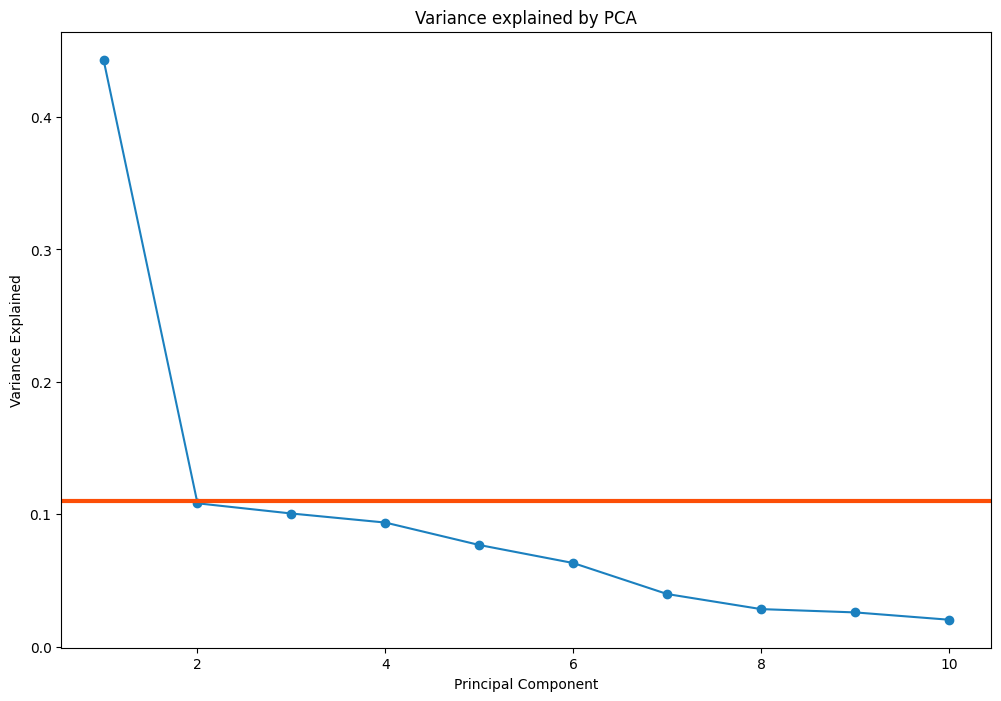

In [30]:
plt.figure(figsize=(12,8))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.11, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

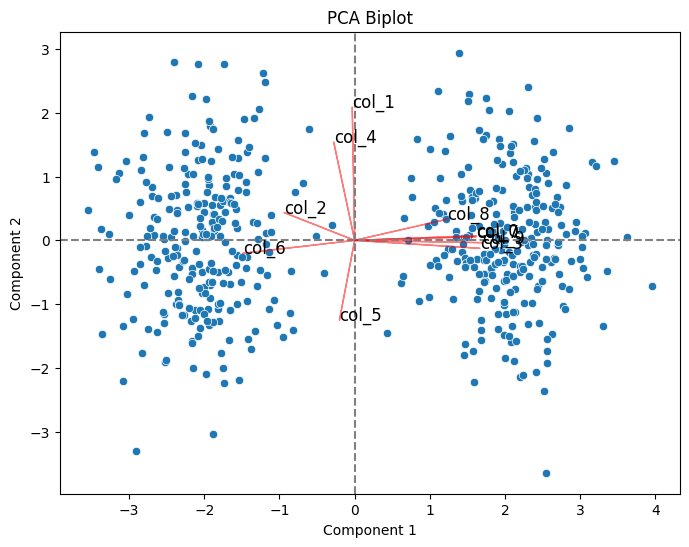

In [31]:
scores = pca.transform(df_linear_normalised)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1])
for i, col in enumerate(df_linear_normalised.columns):
    plt.arrow(0, 0, eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), color='r', alpha=0.5)
    plt.text(eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), col, fontsize=12)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Biplot')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

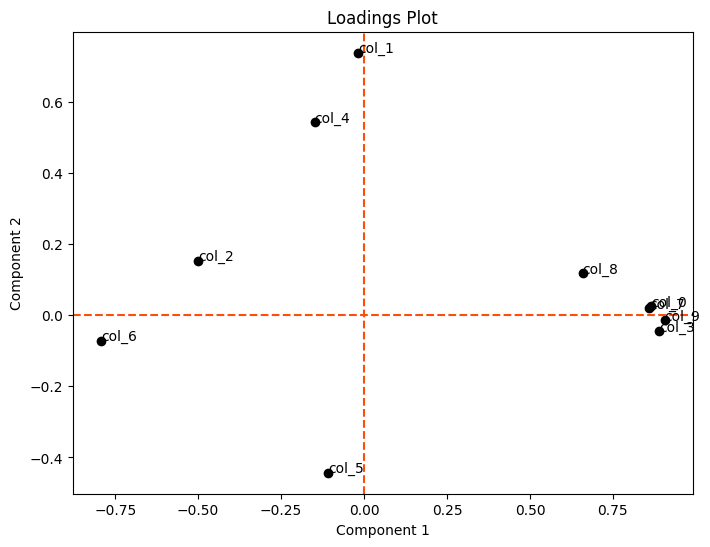

In [32]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(8, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], color='black')
for i, txt in enumerate(df_linear_normalised.columns):
    plt.text(loadings[i, 0], loadings[i, 1], txt, fontsize=10)
plt.axhline(0, color='#FC4E07', linestyle='--')
plt.axvline(0, color='#FC4E07', linestyle='--')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Loadings Plot')
plt.show()

In [33]:
components = scores[:,:2]

In [34]:
print(pd.DataFrame(components, columns=['PC1', 'PC2']).head())

        PC1       PC2
0 -2.364155  0.478490
1 -2.534954 -1.157827
2 -2.672777  0.078419
3 -3.042345  1.245574
4 -2.157728 -0.433252


In [35]:
mean_vals = df_linear_normalised.mean()
std_vals = df_linear_normalised.std()
descriptive_stats = pd.DataFrame({'Mean': mean_vals, 'Sigma': std_vals})
print(descriptive_stats)

               Mean     Sigma
col_0 -1.625367e-16  1.001002
col_1 -1.944445e-15  1.001002
col_2  1.015854e-16  1.001002
col_3  2.278178e-16  1.001002
col_4 -1.023737e-15  1.001002
col_5 -1.811939e-15  1.001002
col_6 -1.286971e-15  1.001002
col_7  2.320366e-16  1.001002
col_8  1.042777e-16  1.001002
col_9 -4.796163e-17  1.001002


## non linear dataset

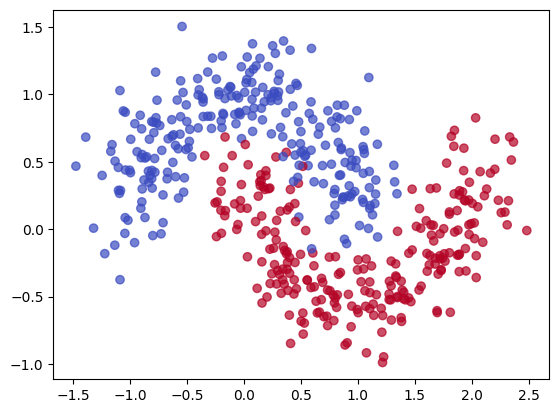

In [36]:
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

num_extra_features = 10
extra_features = np.random.normal(scale=0.5, size=(X.shape[0], num_extra_features))  
X_extended = np.hstack((X, extra_features))

df2 = pd.DataFrame(X_extended, columns=[f"Feature_{i+1}" for i in range(X_extended.shape[1])])
df2["Target"] = y

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.show()

In [37]:
df2

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Target
0,0.830858,-0.334342,-0.211880,-0.226707,-0.897822,-0.165045,0.366415,-0.637116,0.524241,0.243887,-0.367117,-0.070765,1
1,0.991710,0.879000,0.799161,0.366774,0.004392,-0.118842,0.038305,-0.255882,-1.052375,1.021089,0.077662,0.199074,0
2,1.107245,-0.470344,-0.028954,-0.367558,-0.092962,-0.799697,1.138543,-0.617256,-0.515983,-0.220130,0.644038,0.007254,1
3,-0.140899,1.033148,-0.618068,0.627169,0.365500,0.269217,0.357867,1.197181,1.092547,-0.343358,0.811942,0.191584,0
4,0.405592,1.328529,0.249548,-0.846135,-0.085193,-0.406412,0.414029,0.535540,-1.037243,-0.011017,0.560931,-0.093339,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.265123,1.023197,0.433903,0.113703,-0.444922,-0.480390,0.127064,0.348525,0.195941,-0.517299,0.325334,0.212955,0
496,0.193576,-0.011663,-0.535333,-0.392160,0.344248,-0.117254,0.794574,0.250565,-0.243316,-0.005103,0.031692,-0.364195,1
497,0.345548,-0.128434,-0.456294,0.350695,0.422637,0.301891,0.757659,-0.270887,0.837135,-0.450461,-0.506343,-0.879979,1
498,1.403890,-0.466993,-0.222898,-0.251861,0.262969,0.121945,-0.596487,-0.196363,-0.185731,-0.887991,-0.490473,-0.385407,1


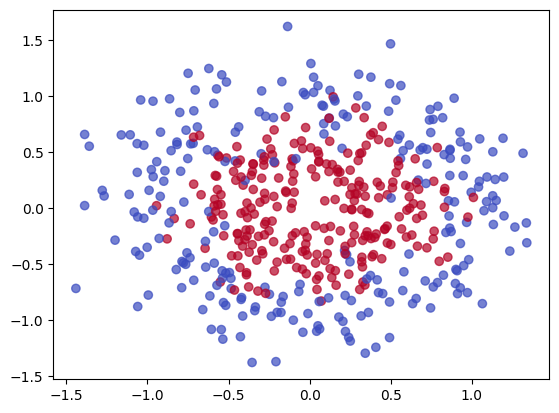

In [38]:
X, y = make_circles(n_samples=500, noise=0.2, factor=0.5, random_state=42)

num_extra_features = 10
extra_features = np.random.normal(scale=0.5, size=(X.shape[0], num_extra_features))
X_extended = np.hstack((X, extra_features))

df3 = pd.DataFrame(X_extended, columns=[f"Feature_{i+1}" for i in range(X_extended.shape[1])])
df3["Target"] = y

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.show()

In [39]:
df3

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Target
0,-0.469004,0.323509,-0.339247,-0.152750,-0.298691,0.055209,0.598589,-0.385521,0.500410,-0.390836,-0.423814,0.409297,1
1,0.125867,1.048157,0.460968,0.425705,-0.657899,-0.232975,0.411494,0.020771,-0.536846,0.229159,-0.357404,0.897262,0
2,-0.386288,0.042201,0.772421,0.302049,0.680503,0.032396,0.382719,0.738860,0.122749,-0.127594,-0.852311,-0.041567,1
3,-0.494481,-0.578267,0.411712,0.472817,0.252183,-0.270650,-0.988411,-0.247608,-0.152172,-0.156464,0.309278,0.992838,0
4,-0.714102,0.865415,0.061765,-0.108366,-0.129611,0.062192,-0.414147,0.060099,0.225406,0.104843,0.228771,0.216874,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.854312,0.509894,0.934016,-0.001956,0.350249,-0.377302,0.251545,0.137547,-0.028253,-0.250879,-0.319015,0.141176,0
496,0.600061,-0.021119,0.314470,-0.063581,0.143634,-0.018957,0.049263,-0.100222,0.008986,1.349020,0.155817,0.322648,1
497,-0.715531,0.630037,0.219012,-0.131408,0.646995,-0.145582,0.527527,-0.167103,-0.479986,0.182698,-0.552334,0.267820,1
498,-0.318829,-0.743461,-0.597079,-0.159504,-0.715865,1.412084,-0.826980,0.004907,0.571652,0.518193,0.425671,-0.158614,1
